# 5 EDA - Investigating San Francisco Housing Prices Through Police Incident Reports and 311 Cases<a id='5_EDA_-_Investigating_San_Francisco_Housing_Prices_Through_Police_Incident_Reports_and_311_Cases'></a>

## 5.1 Contents<a id='5.1_Contents'></a>
* [5 EDA - Investigating San Francisco Housing Prices Through Police Incident Reports and 311 Cases](#5_EDA_-_Investigating_San_Francisco_Housing_Prices_Through_Police_Incident_Reports_and_311_Cases)
  * [5.1 Contents](#5.1_Contents)
  * [5.2 Introduction](#5.2_Introduction)
  * [5.3 Imports](#5.3_Imports)
  * [5.4 Load The Data](#5.4_Load_The_Data)
    * [5.4.1 Year Month](#5.4.1_Year_Month)
  * [5.5 Explore The Data](#5.5_Explore_The_Data)
    * [5.5.1 Housing Price Trends by Neighborhood](#5.5.1_Housing_Price_Trends_by_Neighborhood)
      * [5.5.1.1 Cleanup](#5.5.1.1_Cleanup)
    * [5.5.2 Housing Price Without Time Element](#5.5.2_Housing_Price_Without_Time_Element)
    * [5.5.3 Feature analysis](#5.5.3_Feature_analysis)
      * [5.5.3.1 Feature correlation heatmap](#5.5.3.1_Feature_correlation_heatmap)
      * [5.5.3.2 Scatterplots of features against housing price](#5.5.3.2_Scatterplots_of_features_against_housing_price)
  * [5.6 Save data](#5.6_Save_data)

## 5.2 Introduction<a id='5.2_Introduction'></a>

In this notebook, we will continue our investigation into the relationship between San Francisco housing prices and police incident reports and 311 cases by performing exploratory data analysis on our combined dataset. We created the file `SF_Combined_SFPD_311_Housing.csv` in our previous Jupyter Notebook, `4 Wrangling - Combining SF Data`. This file contains all SF police incident reports, 311 cases, and housing sales data aggregated by month and by neighborhood, from January 2018 up to and including September 2020, wherein each row is an observation with a distinct pairing on month-year and each column represents a possible feature to be used in modelling.

## 5.3 Imports<a id='5.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
# test?
#pd.plotting.register_matplotlib_converters()

## 5.4 Load The Data<a id='5.4_Load_The_Data'></a>

In [3]:
df = pd.read_csv('data/SF_Combined_SFPD_311_Housing.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 82 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Year Month                                    1353 non-null   int64  
 1   Neighborhood                                  1353 non-null   object 
 2   Arson                                         1353 non-null   int64  
 3   Assault                                       1353 non-null   int64  
 4   Burglary                                      1353 non-null   int64  
 5   Case Closure                                  1353 non-null   int64  
 6   Civil Sidewalks                               1353 non-null   int64  
 7   Courtesy Report                               1353 non-null   int64  
 8   Disorderly Conduct                            1353 non-null   int64  
 9   Drug Offense                                  1353 non-null   i

In [5]:
df.head()

,Year Month,Neighborhood,Arson,Assault,Burglary,Case Closure,Civil Sidewalks,Courtesy Report,Disorderly Conduct,Drug Offense,...,SFHA Requests,Sewer Issues,Sidewalk or Curb,Sign Repair,Street Defects,Street and Sidewalk Cleaning,Streetlights,Temporary Sign Request,Tree Maintenance,Median Sale Price
0,201801,Bayview Hunters Point,5,64,42,1,0,1,27,16,...,16,81,13,5,39,1185,12,0,23,830000.0
1,201801,Bernal Heights,2,22,8,1,0,0,8,0,...,0,44,8,9,20,479,25,0,27,1538500.0
2,201801,Castro/Upper Market,1,19,29,1,3,0,2,5,...,0,26,17,8,13,465,36,0,28,1351000.0
3,201801,Chinatown,1,12,10,1,0,10,2,3,...,2,4,9,20,8,357,9,1,2,1500000.0
4,201801,Excelsior,0,24,12,0,0,0,5,6,...,0,37,3,5,10,536,20,0,9,985000.0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year Month,1353.0,2.018970e+05,78.786131,201801.0,201809.0,201905.0,202001.0,202009.0
Arson,1353.0,7.368810e-01,1.388437,0.0,0.0,0.0,1.0,10.0
Assault,1353.0,1.696600e+01,25.721547,0.0,3.0,8.0,15.0,138.0
Burglary,1353.0,1.438655e+01,15.374632,0.0,4.0,10.0,19.0,106.0
Case Closure,1353.0,1.203991e+00,2.476472,0.0,0.0,0.0,1.0,26.0
...,...,...,...,...,...,...,...,...
Street and Sidewalk Cleaning,1353.0,5.001523e+02,577.284665,0.0,142.0,392.0,643.0,4605.0
Streetlights,1353.0,9.090170e+00,10.128063,0.0,2.0,6.0,12.0,67.0
Temporary Sign Request,1353.0,4.083518e+00,8.192017,0.0,0.0,1.0,5.0,85.0
Tree Maintenance,1353.0,2.158093e+01,20.148476,0.0,8.0,18.0,29.0,193.0


### 5.4.1 Year Month<a id='#5.4.1_Year_Month'></a>

Note that the column `Year Month` is currently of type `int64`. `matplotlib` has trouble plotting period data, and so instead, we will use a bit of a hack: every distinct `Year Month` will have an associated and ordered numeric representation in column `Period`. That is, January 2018 will be represented by the number 1, February 2018 by the number 2, and so on. Then, when plotting, we will utilize the numeric column data but display the `Year Month` data in the axis labels.

We'll also convert `Year Month` to type `str`.

In [7]:
df['Year Month'].dtype

dtype('int64')

In [8]:
# convert it to type string, then datetime, then to type Period
#data['Year Month'] = pd.to_datetime( data['Year Month'].astype(str), format='%Y%m').dt.to_period("M")
df['Year Month'] = df['Year Month'].astype(str)

In [9]:
# create mapping from 'Year Month' to 'Period'
periodKeys = np.sort(df['Year Month'].unique()).tolist()
periodMapper = dict(zip(periodKeys,np.arange(1,len(periodKeys)+1,1)))
periodMapper

{'201801': 1,
 '201802': 2,
 '201803': 3,
 '201804': 4,
 '201805': 5,
 '201806': 6,
 '201807': 7,
 '201808': 8,
 '201809': 9,
 '201810': 10,
 '201811': 11,
 '201812': 12,
 '201901': 13,
 '201902': 14,
 '201903': 15,
 '201904': 16,
 '201905': 17,
 '201906': 18,
 '201907': 19,
 '201908': 20,
 '201909': 21,
 '201910': 22,
 '201911': 23,
 '201912': 24,
 '202001': 25,
 '202002': 26,
 '202003': 27,
 '202004': 28,
 '202005': 29,
 '202006': 30,
 '202007': 31,
 '202008': 32,
 '202009': 33}

In [10]:
df['Period'] = df['Year Month'].apply(lambda x: periodMapper[x])

In [11]:
df[['Year Month','Period']].head()

,Year Month,Period
0,201801,1
1,201801,1
2,201801,1
3,201801,1
4,201801,1


## 5.5 Explore The Data<a id='5.5_Explore_The_Data'></a>

### 5.5.1 Housing Price Trends by Neighborhood<a id='5.5.1_Housing_Price_Trends_by_Neighborhood'></a>

Since we have time series data, let's visualize the housing prices to see if there are any pricing trends occuring in each neighborhood.

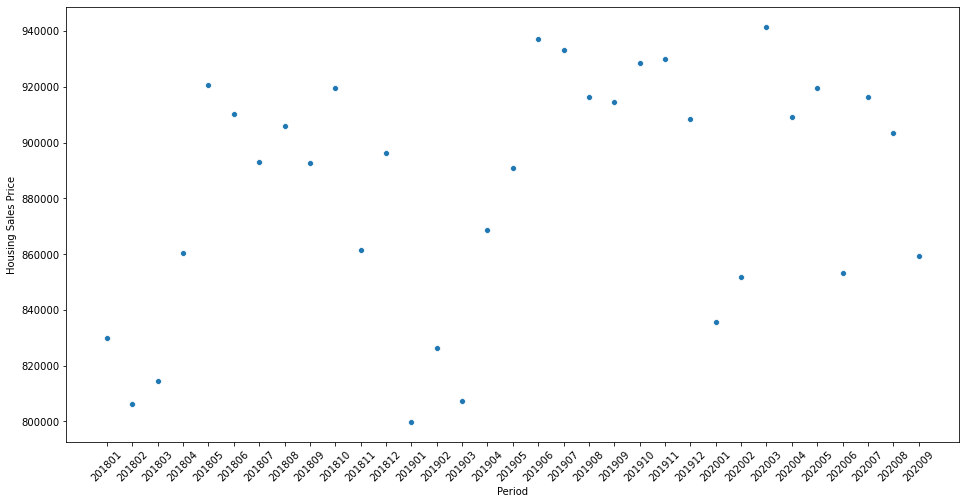

In [12]:
# let's look at one neighborhood first
f, ax = plt.subplots(figsize=(16,8))
df_bayview = df[df['Neighborhood'] == 'Bayview Hunters Point']
g = sns.scatterplot(data=df_bayview, x='Period', y='Median Sale Price')
_ = g.set_xticks(df_bayview['Period'])
_ = g.set_xticklabels(df_bayview['Year Month'], rotation=45)
_ = g.set_ylabel('Housing Sales Price')

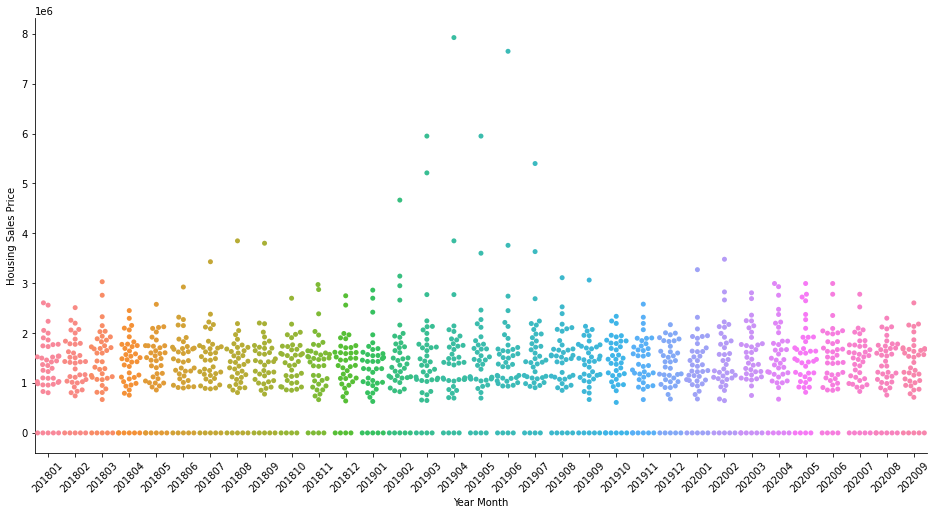

In [13]:
# look at all neighborhoods
f, ax = plt.subplots(figsize=(16,8))
g = sns.swarmplot(data=df, x='Year Month', y='Median Sale Price')
sns.despine()
_ = plt.ylabel('Housing Sales Price')
_ = plt.xticks(rotation=45)

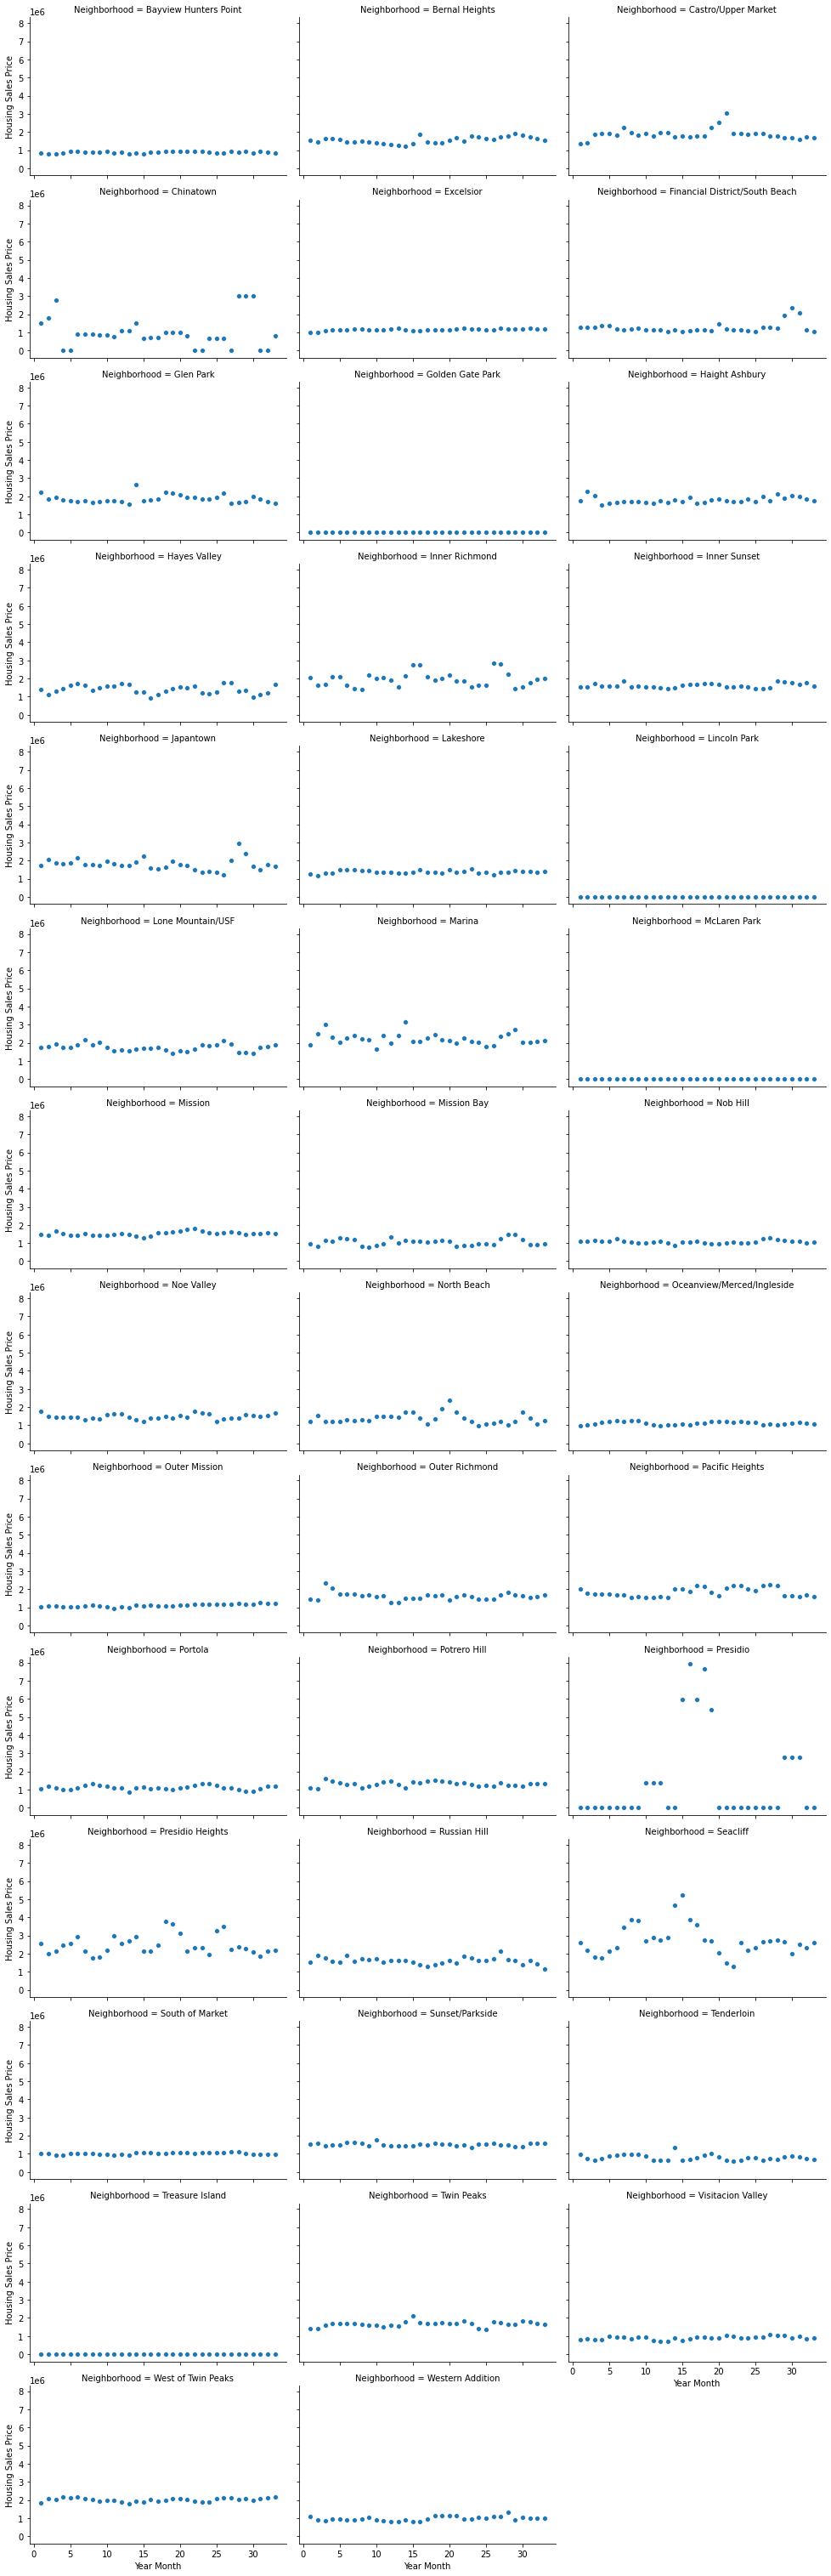

In [14]:
# look at all neighborhoods separately
g = sns.FacetGrid(df, col='Neighborhood', col_wrap=3, aspect=1.5)
_ = g.map_dataframe(sns.scatterplot, x='Period', y='Median Sale Price')
_ = g.set_axis_labels('Year Month', 'Housing Sales Price')

#### 5.5.1.1 Cleanup<a id='5.5.1.1_Cleanup'></a>

We can see that some Neighborhoods have either zeroed housing price data (no housing sales), or inconsistent data (no housing sales in certain months). Let's clean this up by:
  * removing the Neighborhoods with no housing sales at all: Golden Gate Park, Lincoln Park, McLaren Park, and Treasure Island
  * for those Neighborhoods with no housing sales in certain months
    * Chinatown: change the zero housing sale price to the mean housing sale price
    * Presidio: we have too many months without housing sales, and of those months with housing sales, the range is too great. Drop the data.

In [15]:
df.shape

(1353, 83)

In [16]:
df[df['Median Sale Price'] == 0].groupby('Neighborhood')['Year Month'].count().sort_values(ascending=False)

Neighborhood
Treasure Island     33
McLaren Park        33
Lincoln Park        33
Golden Gate Park    33
Presidio            22
Chinatown            7
Name: Year Month, dtype: int64

In [17]:
# drop data in the
neighborhoods_to_drop = ['Golden Gate Park', 'Lincoln Park', 'McLaren Park', 'Treasure Island', 'Presidio']
df.drop(df[df['Neighborhood'].isin(neighborhoods_to_drop)].index, inplace=True)

In [18]:
df.shape

(1188, 83)

In [19]:
# interpolate sale prices for Chinatown
df_chinatown = df[df['Neighborhood'] == 'Chinatown'][['Year Month', 'Median Sale Price']]
df_chinatown[df_chinatown['Median Sale Price'] == 0]

,Year Month,Median Sale Price
126,201804,0.0
167,201805,0.0
864,201910,0.0
905,201911,0.0
1069,202003,0.0
1233,202007,0.0
1274,202008,0.0


In [20]:
chinatown_nonzero_avg = round(df_chinatown[df_chinatown['Median Sale Price'] != 0]['Median Sale Price'].mean(),2)
chinatown_nonzero_avg

1252384.62

In [21]:
# update zero Chinatown values
df.loc[(df['Neighborhood'] == 'Chinatown') & (df['Median Sale Price'] == 0), 'Median Sale Price'] = chinatown_nonzero_avg

In [22]:
df[df['Neighborhood'] == 'Chinatown'][['Year Month', 'Median Sale Price']]

,Year Month,Median Sale Price
3,201801,1500000.00
44,201802,1795000.00
85,201803,2760000.00
126,201804,1252384.62
167,201805,1252384.62
208,201806,900000.00
249,201807,900000.00
290,201808,900000.00
331,201809,855000.00
372,201810,855000.00


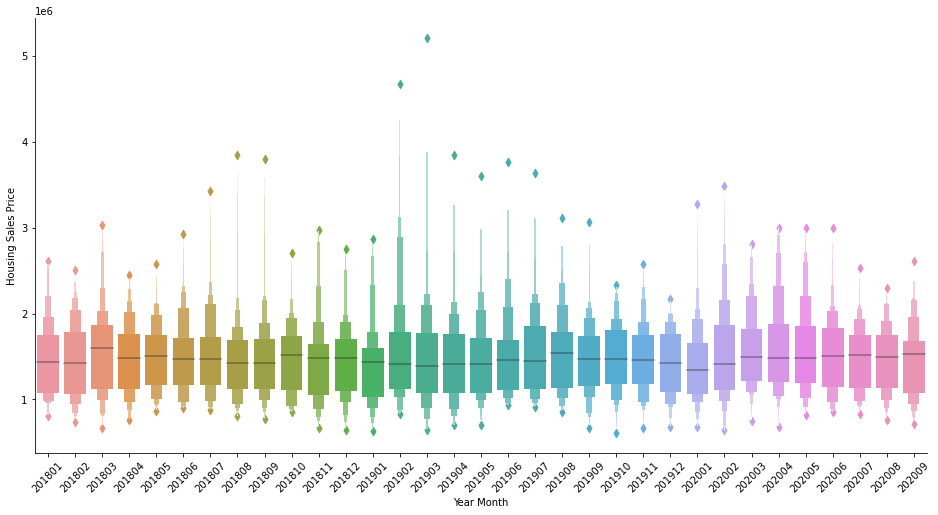

In [23]:
# look at all neighborhoods
f, ax = plt.subplots(figsize=(16,8))
g = sns.boxenplot(data=df, x='Year Month', y='Median Sale Price')
sns.despine()
_ = plt.ylabel('Housing Sales Price')
_ = plt.xticks(rotation=45)

### 5.5.2 Housing Price Without Time Element<a id='5.5.2_Housing_Price_Without_Time_Element'></a>

For the purposes of our model, we will remove the time element from the problem, since Time Series Regression is out of scope of this project. With that in mind, let's look at all our housing prices in a histogram.

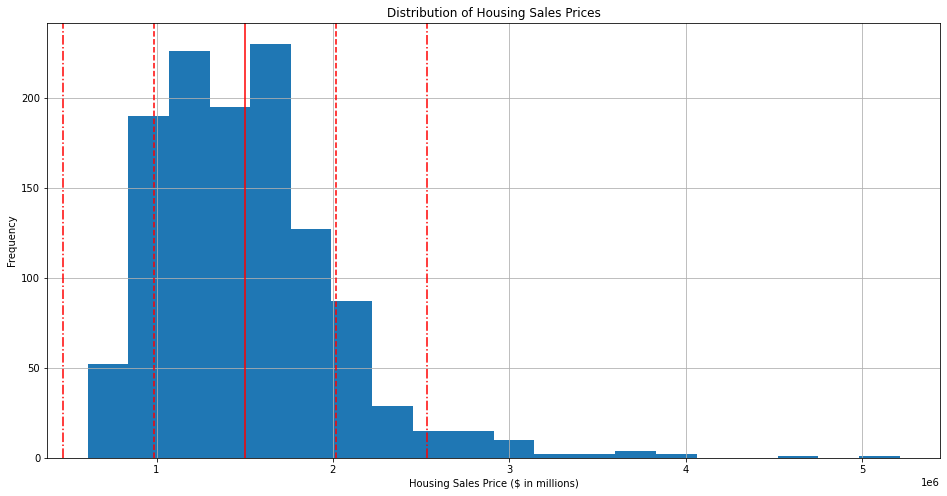

In [24]:
price_mean = df['Median Sale Price'].mean()
price_std = df['Median Sale Price'].std()

plt.subplots(figsize=(16,8))
_ = df['Median Sale Price'].hist(bins=20)
_ = plt.xlabel('Housing Sales Price ($ in millions)')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of Housing Sales Prices')
_ = plt.axvline(price_mean, color='r')
_ = plt.axvline(price_mean+price_std, color='r', linestyle='--')
_ = plt.axvline(price_mean-price_std, color='r', linestyle='--')
_ = plt.axvline(price_mean+2*price_std, color='r', linestyle='-.')
_ = plt.axvline(price_mean-2*price_std, color='r', linestyle='-.')

In [25]:
df['Median Sale Price'].describe().apply(lambda x: format(x, '.02f'))

count       1188.00
mean     1502009.07
std       516640.64
min       611000.00
25%      1112375.00
50%      1458666.67
75%      1756500.00
max      5212500.00
Name: Median Sale Price, dtype: object

We can see that the mean housing price is approximately \\$1.5M, with a standard deviation of approximation \\$0.5M.

In [26]:
# let's drop the Period column since we've decided to disregard the Time Series aspect of the data
df.drop(columns=['Period'], inplace=True)

### 5.5.3 Feature analysis<a id='5.5.3_Feature_analysis'></a>

Let's begin looking at our different features. We won't be able to use `sns.pairplot()` since we have 80+ features! Instead, let's look at a heatmap of the correlation between our features.

In [27]:
df.columns

Index(['Year Month', 'Neighborhood', 'Arson', 'Assault', 'Burglary',
       'Case Closure', 'Civil Sidewalks', 'Courtesy Report',
       'Disorderly Conduct', 'Drug Offense', 'Drug Violation', 'Embezzlement',
       'Family Offense', 'Fire Report', 'Forgery And Counterfeiting', 'Fraud',
       'Gambling', 'Homicide', 'Human Trafficking (A), Commercial Sex Acts',
       'Human Trafficking (B), Involuntary Servitude',
       'Human Trafficking, Commercial Sex Acts', 'Larceny Theft',
       'Liquor Laws', 'Lost Property', 'Malicious Mischief',
       'Miscellaneous Investigation', 'Missing Person', 'Motor Vehicle Theft',
       'Motor Vehicle Theft?', 'Non-Criminal',
       'Offences Against The Family And Children', 'Other',
       'Other Miscellaneous', 'Other Offenses', 'Prostitution', 'Rape',
       'Recovered Vehicle', 'Robbery', 'Sex Offense', 'Stolen Property',
       'Suicide', 'Suspicious', 'Suspicious Occ', 'Traffic Collision',
       'Traffic Violation Arrest', 'Vandalism', 'Ve

#### 5.5.3.1 Feature correlation heatmap<a id='5.5.3.1_Feature_correlation_heatmap'></a>

Let's look specifically for features correlated with each other.

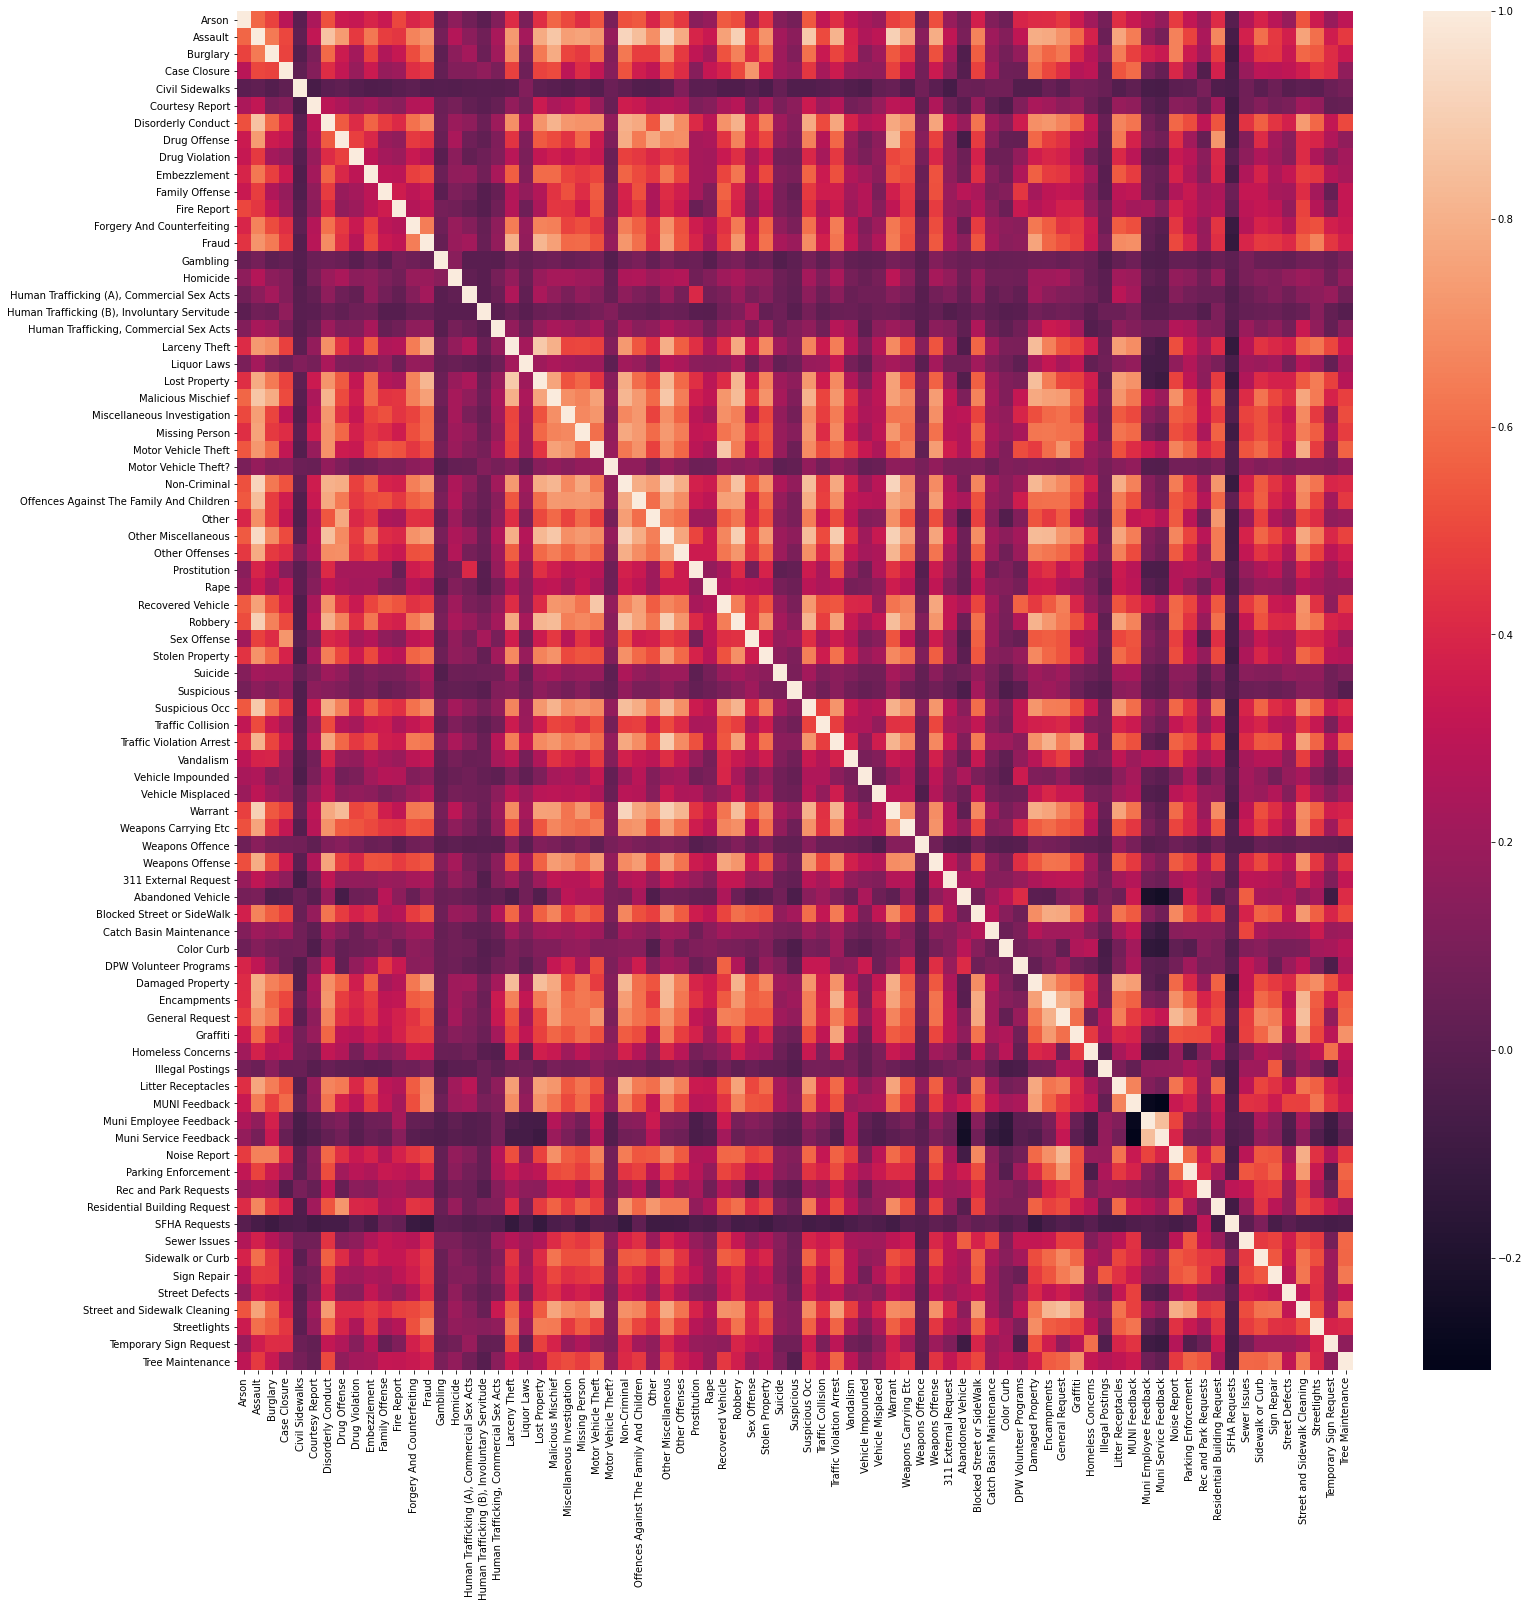

In [28]:
# Make a heatmap of the data 
plt.subplots(figsize=(25,25))
_ = sns.heatmap(df.drop(columns=['Median Sale Price']).corr())

Some of the features with strong correlations to each other are:
  * Strong positive correlations:
    * Larceny Theft, and Lost Property
    * Motor Vehicle Theft, and Recovered Vehicle
    * Non-Criminal, and Warrant
  * Strong negative correlations: (note, however, that the strength of the strongest negative correlation is much less than that of the strongest positive correlation)
    * Fraud, and SFHA Requests
    * Abandoned Vehicle, and both Muni Employee Feedback and Muni Service Feedback
    * MUNI Feedback, and both Muni Employee Feedback and Muni Service Feedback

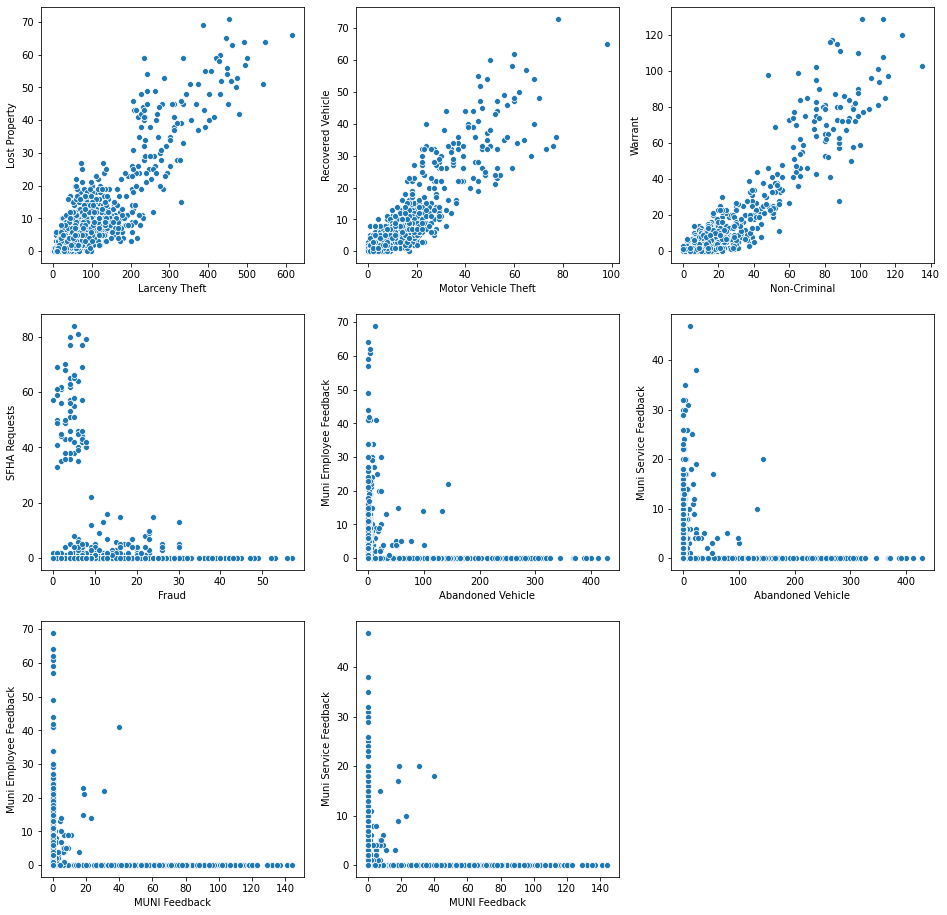

In [31]:
# Plot the above identified strong correlations
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
ax = fig.add_subplot(3,3,1)
_ = sns.scatterplot(x='Larceny Theft', y='Lost Property', data=df, ax=ax)
ax = fig.add_subplot(3,3,2)
_ = sns.scatterplot(x='Motor Vehicle Theft', y='Recovered Vehicle', data=df, ax=ax)
ax = fig.add_subplot(3,3,3)
_ = sns.scatterplot(x='Non-Criminal', y='Warrant', data=df, ax=ax)
ax = fig.add_subplot(3,3,4)
_ = sns.scatterplot(x='Fraud', y='SFHA Requests', data=df, ax=ax)
ax = fig.add_subplot(3,3,5)
_ = sns.scatterplot(x='Abandoned Vehicle', y='Muni Employee Feedback', data=df, ax=ax)
ax = fig.add_subplot(3,3,6)
_ = sns.scatterplot(x='Abandoned Vehicle', y='Muni Service Feedback', data=df, ax=ax)
ax = fig.add_subplot(3,3,7)
_ = sns.scatterplot(x='MUNI Feedback', y='Muni Employee Feedback', data=df, ax=ax)
ax = fig.add_subplot(3,3,8)
_ = sns.scatterplot(x='MUNI Feedback', y='Muni Service Feedback', data=df, ax=ax)

As we suspected, the strongest negative correlations do not indicate much. However, the positive correlations can indeed be interpreted:
  * San Francisco has a lot of vehicle break-ins, as well as vehicle thefts.
  * Both `Lost Property` and `Larceny Theft` are associated with vehicle break-ins.
  * Vehicles that are stolen (`Motor Vehicle Theft`) are frequently recovered (`Recovered Vehicle`).

#### 5.5.3.2 Scatterplots of features against housing price<a id='5.5.3.2_Scatterplots_of_features_against_housing_price'></a>

Let's create a series of scatterplots to view how housing price varies with other numeric features. Keep in mind, all these features are "bad", that is, they are all crime or complaint based and should have a negative impact on housing price. The question we are trying to answer is, just how negative?

In [32]:
# let's first look at the correlations between 'Median Sale Price' and the other features
housing_price_corr = df[df.columns[2:]].corr()[['Median Sale Price']]
# print the full data frame
pd.set_option('display.max_rows', None)
display(housing_price_corr.sort_values(by=['Median Sale Price']))
pd.reset_option('display.max_rows')

,Median Sale Price
Offences Against The Family And Children,-0.394980
Robbery,-0.360125
Assault,-0.353496
Recovered Vehicle,-0.345791
Suspicious Occ,-0.339635
Malicious Mischief,-0.334793
Non-Criminal,-0.333805
Litter Receptacles,-0.315261
Other,-0.311777
Weapons Offense,-0.309700


In [33]:
# define useful function to create scatterplots of Median Sale Price against desired columns
# show regression and accept R coefficient values
def scatterplotswithreg(columns, ncol=None, figsize=(15, 8), annotateR=False, rValues={}):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.2, hspace=0.4)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        #ax.scatter(x = col, y = 'Median Sale Price', data=df, alpha=0.5)
        g = sns.regplot(x = col, y = 'Median Sale Price', data=df, ax=ax)
        if annotateR:
            g.annotate("r = {:.2f}".format(rValues[col]), xy=(.7,.9), xycoords=ax.transAxes)
        ax.set(xlabel=col, ylabel='Housing price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [34]:
#Use a list comprehension to build a list of features that are _not_ any of 'Year Month', 'Neighborhood', or ''Median Sale Price''
features = [c for c in df.columns if c not in ['Year Month', 'Neighborhood', 'Median Sale Price']]

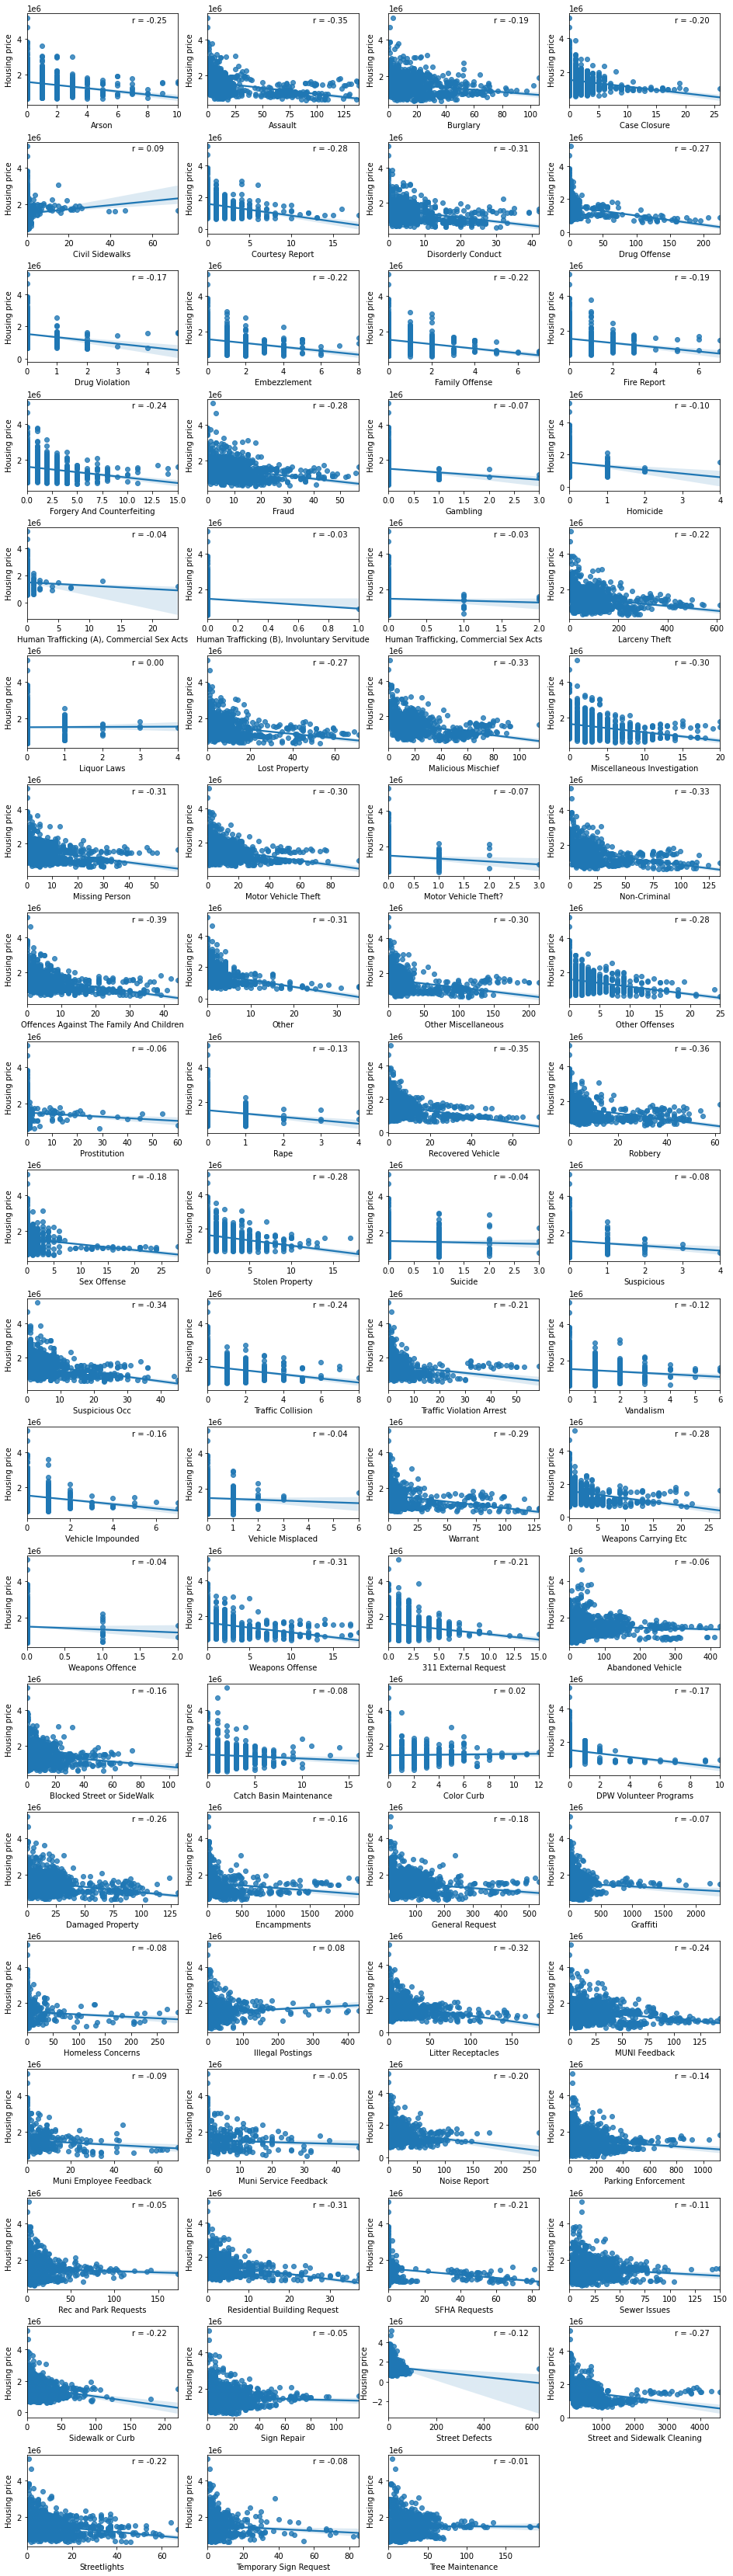

In [35]:
# pass in correlation coefficient so it can be annotated
scatterplotswithreg(features, ncol=4, figsize=(16, 60), annotateR=True, rValues=housing_price_corr.to_dict()['Median Sale Price'])

Here, we see that some of the features with the strongest (negative) correlations are:
  * Assault
  * Drug Offense
  * Larceny Theft
  * Lost Property
  * Malicious Mischief
  * Non-Criminal
  * Offences Against The Family and Children
  * Robbery
  * Suspicious Occ
  * Warrant
  * Weapons Carrying Etc
  * Damaged Property
  * Litter Receptacles
  * Residential Building Request

## 5.6 Save data<a id='5.6_Save_data'></a>

We have to save the data again because we did some cleaning earlier.

In [36]:
datapath = 'data'

# create datapath if it doesn't exist
if not os.path.exists(datapath):
    os.mkdir(datapath)

In [37]:
# write combined data
datapath_combineddata = os.path.join(datapath, 'Post_EDA_SF_Combined_SFPD_311_Housing.csv')
if not os.path.exists(datapath_combineddata):
    df.to_csv(datapath_combineddata, index=False)